<a href="https://colab.research.google.com/github/EASWAR17/nn-classification/blob/main/dl_ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import pandas as pd
df = pd.read_csv("customers.csv")

import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf

In [4]:

df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [5]:
df = df.drop('ID',axis=1)
df = df.drop('Var_1',axis=1)

df_cleaned = df.dropna(axis=0)

df_cleaned.isnull().sum()


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [7]:
categories_list=[['Male', 'Female'],['No', 'Yes'],
               ['No', 'Yes'],['Healthcare', 'Engineer',
               'Lawyer','Artist', 'Doctor','Homemaker',
               'Entertainment', 'Marketing', 'Executive'],
               ['Low', 'Average', 'High']]
enc = OrdinalEncoder(categories=categories_list)

df1 = df_cleaned.copy()

df1[['Gender','Ever_Married',
     'Graduated','Profession',
     'Spending_Score']] = enc.fit_transform(df1[['Gender',
     						'Ever_Married','Graduated',
                            'Profession','Spending_Score']])
df1
df1.dtypes



Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation        object
dtype: object

In [8]:

le = LabelEncoder()
df1['Segmentation'] = le.fit_transform(df1['Segmentation'])

df1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

<Axes: >

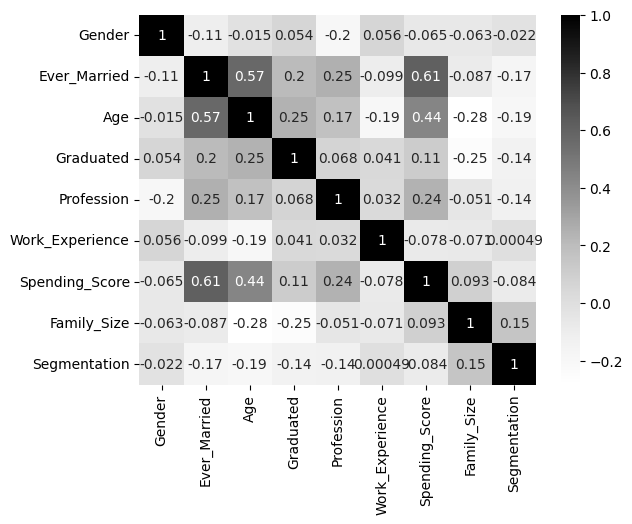

In [10]:
corr = df1.corr()

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="Greys",
            annot= True)



<ipython-input-11-29dcdd096848>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

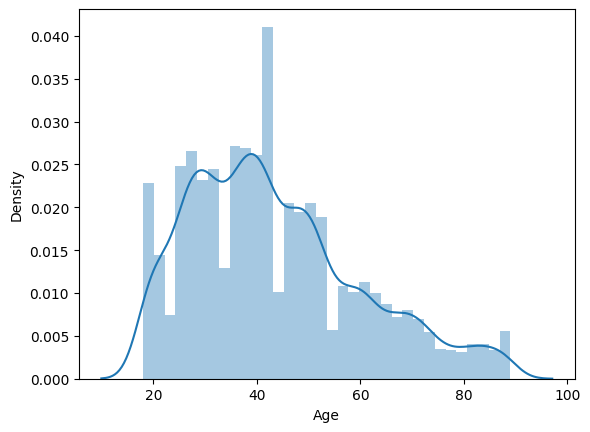

In [11]:
sns.distplot(df1['Age'])


In [12]:
scale = MinMaxScaler()
scale.fit(df1[["Age"]]) # Fetching Age column alone
df1[["Age"]] = scale.transform(df1[["Age"]])

df1.describe()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000
mean,0.449753,0.591389,0.359171,0.633543,3.284735,2.612747,0.545414,2.841165,1.518660
std,0.497497,0.491605,0.233407,0.481863,2.346963,3.391636,0.738536,1.533532,1.146635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.183099,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,0.323944,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,0.492958,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [13]:

df1['Segmentation'].unique()



array([3, 1, 2, 0])

In [14]:
x = df1[['Gender','Ever_Married','Age','Graduated',
		 'Profession','Work_Experience','Spending_Score',
         'Family_Size']].values

y1 = df1[['Segmentation']].values

ohe = OneHotEncoder()
ohe.fit(y1)

y = ohe.transform(y1).toarray()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=50)

In [16]:
ai = Sequential([Dense(9,input_shape = [8]),
               Dense(19,activation="relu"),
               Dense(19,activation="relu"),
               Dense(19,activation="relu"),
               Dense(4,activation="softmax")])

In [17]:
ai.compile(optimizer='adam',
         loss='categorical_crossentropy',
         metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(
  monitor='val_loss',
  mode='max',
  verbose=1,
  patience=20)

In [19]:
ai.fit( x = x_train, y = y_train,
      epochs=500, batch_size=256,
      validation_data=(x_test,y_test),
      callbacks = [early_stop]
      )

Epoch 1/500
24/24 [==============================] - 2s 13ms/step - loss: 1.3884 - accuracy: 0.2966 - val_loss: 1.3560 - val_accuracy: 0.3163
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 1.3518 - accuracy: 0.3268 - val_loss: 1.3328 - val_accuracy: 0.3712
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 1.3333 - accuracy: 0.3637 - val_loss: 1.3147 - val_accuracy: 0.3844
Epoch 4/500
24/24 [==============================] - 0s 6ms/step - loss: 1.3186 - accuracy: 0.3639 - val_loss: 1.3017 - val_accuracy: 0.3867
Epoch 5/500
24/24 [==============================] - 0s 4ms/step - loss: 1.3079 - accuracy: 0.3678 - val_loss: 1.2925 - val_accuracy: 0.3941
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 1.2997 - accuracy: 0.3732 - val_loss: 1.2838 - val_accuracy: 0.3962
Epoch 7/500
24/24 [==============================] - 0s 6ms/step - loss: 1.2917 - accuracy: 0.3825 - val_loss: 1.2745 - val_accuracy: 0.3985
Epoch 8/500


93/93 [==============================] - 0s 1ms/step


(2966,)

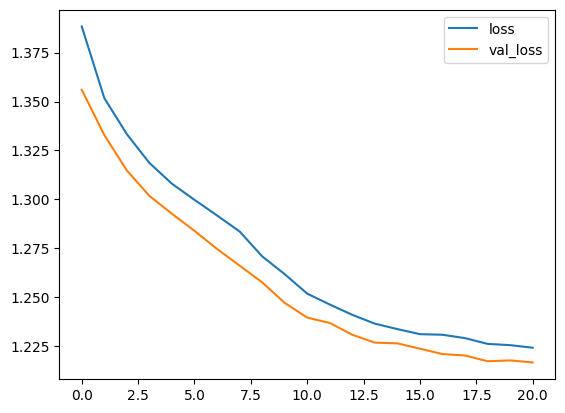

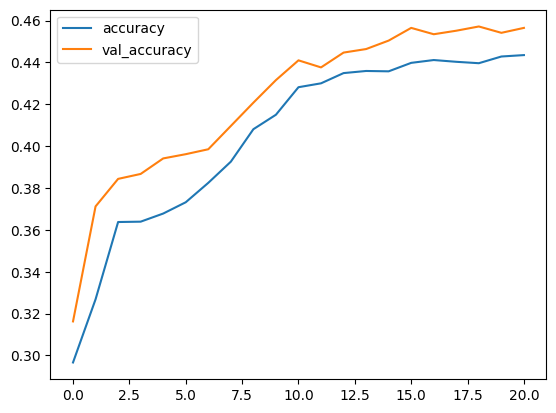

In [21]:
import numpy as np
metrics = pd.DataFrame(ai.history.history)


metrics[['loss','val_loss']].plot()

metrics[['accuracy','val_accuracy']].plot()

x_pred = np.argmax(ai.predict(x_test), axis=1)
x_pred.shape

In [22]:
y_truevalue = np.argmax(y_test,axis=1)
y_truevalue.shape

(2966,)

In [33]:
conf(y_truevalue,x_pred)

array([[340, 108, 156, 175],
       [209, 114, 255,  91],
       [113, 106, 420,  92],
       [177,  60,  70, 480]])

In [23]:
print(report(y_truevalue,x_pred))

              precision    recall  f1-score   support

           0       0.41      0.44      0.42       779
           1       0.29      0.17      0.22       669
           2       0.47      0.57      0.51       731
           3       0.57      0.61      0.59       787

    accuracy                           0.46      2966
   macro avg       0.43      0.45      0.44      2966
weighted avg       0.44      0.46      0.44      2966



In [31]:
x_prediction = np.argmax(ai.predict(x_test[1:17,:]), axis=1)

print(x_prediction)

1/1 [==============================] - 0s 180ms/step
[0 2 1 3 0 3 0 2 0 0 2 0 3 0 3 0]


In [32]:
print(le.inverse_transform(x_prediction))

['A' 'C' 'B' 'D' 'A' 'D' 'A' 'C' 'A' 'A' 'C' 'A' 'D' 'A' 'D' 'A']
